In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = 100

## 1. Data Overview

In [41]:
data = pd.read_csv('TVdata.txt')

In [42]:
data.head(5)

,video_id,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,import_id,release_year,genres,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,awards,mpaa,star_category
0,385504,307127.605608,1,3,lionsgate,2013,"Action,Thriller,Drama",69614,15000000,42930462,6.5,112.301017,51,other award,PG-13,1.710000
1,300175,270338.426375,1,3,lionsgate,2013,"Comedy,Crime,Thriller",46705,15000000,3301046,6.5,94.983250,41,no award,R,3.250000
2,361899,256165.867446,1,3,other,2012,"Crime,Drama",197596,26000000,37397291,7.3,115.763675,58,other award,R,2.646667
3,308314,196622.720996,3,4,lionsgate,2008,"Thriller,Drama,War,Documentary,Mystery,Action",356339,15000000,15700000,7.6,130.703583,94,Oscar,R,1.666667
4,307201,159841.652064,1,3,lionsgate,2013,"Crime,Thriller,Mystery,Documentary",46720,27220000,8551228,6.4,105.545533,37,other award,R,3.066667


In [43]:
print("The dataset contains {0} rows and {1} columns".format( data.shape[0], data.shape[1]))

The dataset contains 4226 rows and 16 columns


### 1.1 Check if there is duplicated data

In [44]:
any(data.duplicated('video_id'))

False

In [45]:
data = data.set_index('video_id')

In [46]:
data.columns

Index(['cvt_per_day', 'weighted_categorical_position',
       'weighted_horizontal_poition', 'import_id', 'release_year', 'genres',
       'imdb_votes', 'budget', 'boxoffice', 'imdb_rating', 'duration_in_mins',
       'metacritic_score', 'awards', 'mpaa', 'star_category'],
      dtype='object')

In [47]:
data.describe(percentiles=[0.1,0.25,0.5,0.75,0.9,1.0])

,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,release_year,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,star_category
count,4226.000000,4226.000000,4226.000000,4226.000000,4226.000000,4.226000e+03,4.226000e+03,4226.000000,4226.000000,4226.000000,4226.000000
mean,4218.630239,7.782537,28.103644,2001.056791,6462.924042,2.150743e+06,2.536338e+06,5.257099,89.556123,15.973734,0.954651
std,13036.079964,6.134183,11.863649,17.496849,31596.006790,7.176604e+06,8.243516e+06,2.122810,21.086183,26.205217,0.955045
min,2.187625,1.000000,1.000000,1916.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,4.037250,0.000000,0.000000
10%,141.984913,3.000000,13.000000,1974.000000,8.000000,0.000000e+00,0.000000e+00,2.300000,62.390781,0.000000,0.000000
25%,351.168776,4.000000,20.000000,1998.000000,81.000000,0.000000e+00,0.000000e+00,4.300000,82.601712,0.000000,0.000000
50%,1193.499989,6.000000,28.000000,2008.000000,535.000000,0.000000e+00,0.000000e+00,5.800000,90.730308,0.000000,1.000000
75%,3356.788816,9.000000,36.000000,2012.000000,3053.000000,1.500000e+06,0.000000e+00,6.800000,99.500312,41.000000,1.666667
90%,7930.121453,15.000000,44.000000,2014.000000,12180.500000,5.000000e+06,8.551228e+06,7.500000,111.033917,57.000000,2.250000
100%,307127.605608,41.000000,70.000000,2017.000000,948630.000000,1.070000e+08,1.842088e+08,10.000000,246.016767,100.000000,4.000000


In [48]:
num_cols = ['cvt_per_day', 'weighted_categorical_position','weighted_horizontal_poition',\
           'release_year', 'imdb_votes', 'budget', 'boxoffice', 'imdb_rating', 'duration_in_mins',\
            'metacritic_score','star_category']
str_cols = ['import_id','genres', 'awards', 'mpaa']

### 1.2 Distribution of numerical columns

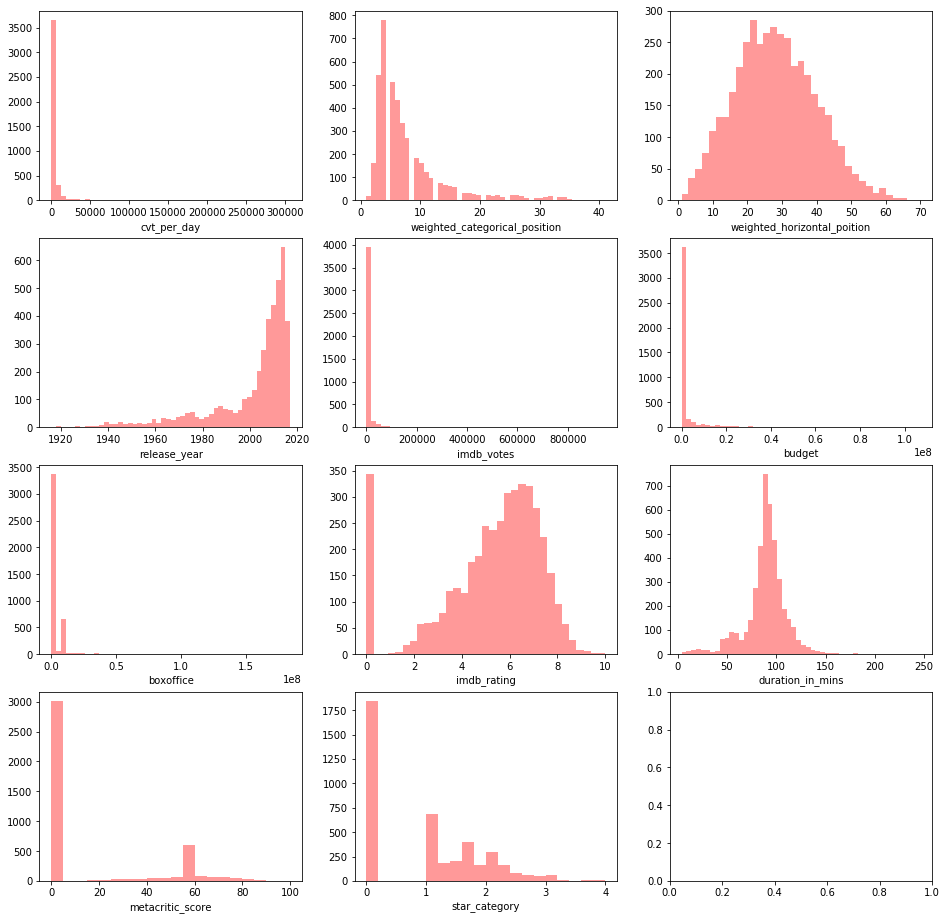

In [49]:
fig, ax = plt.subplots(nrows=4,ncols=3, figsize=(16,16))
for i in range(len(num_cols)):
    col = num_cols[i]
    sns.distplot(data[col], kde= False, ax = ax[i//3][i%3], color='red')    

### 1.3 Finer plot of 'cvt_perday'

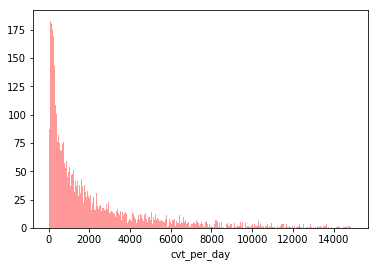

In [50]:
sns.distplot(data['cvt_per_day'], kde= False, bins = range(0,15000,50), color='red') 

### 1.3 Correlations

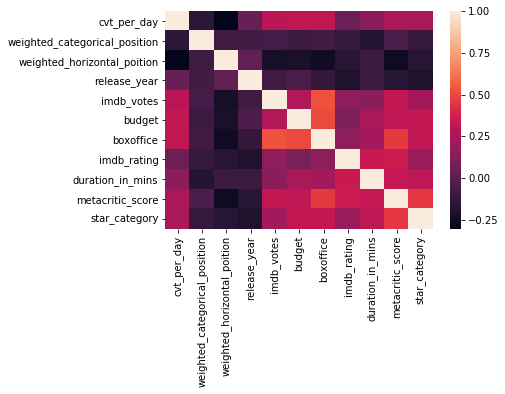

In [51]:
sns.heatmap(data[num_cols].corr())

In [52]:
data[num_cols].corr()

,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,release_year,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,star_category
cvt_per_day,1.000000,-0.148000,-0.301663,0.045859,0.297697,0.315886,0.312209,0.058894,0.152217,0.249159,0.246956
weighted_categorical_position,-0.148000,1.000000,-0.084066,-0.068902,-0.063700,-0.089899,-0.073628,-0.116443,-0.174461,-0.044317,-0.122851
weighted_horizontal_poition,-0.301663,-0.084066,1.000000,0.026634,-0.220749,-0.211356,-0.244709,-0.162021,-0.102344,-0.255015,-0.167801
release_year,0.045859,-0.068902,0.026634,1.000000,-0.082661,-0.040121,-0.128091,-0.198856,-0.096811,-0.167038,-0.198454
imdb_votes,0.297697,-0.063700,-0.220749,-0.082661,1.000000,0.272852,0.531467,0.163264,0.155670,0.321860,0.225192
budget,0.315886,-0.089899,-0.211356,-0.040121,0.272852,1.000000,0.504618,0.105671,0.251342,0.314608,0.321721
boxoffice,0.312209,-0.073628,-0.244709,-0.128091,0.531467,0.504618,1.000000,0.163673,0.226184,0.464965,0.322329
imdb_rating,0.058894,-0.116443,-0.162021,-0.198856,0.163264,0.105671,0.163673,1.000000,0.344055,0.346935,0.191768
duration_in_mins,0.152217,-0.174461,-0.102344,-0.096811,0.155670,0.251342,0.226184,0.344055,1.000000,0.327050,0.309110
metacritic_score,0.249159,-0.044317,-0.255015,-0.167038,0.321860,0.314608,0.464965,0.346935,0.327050,1.000000,0.452445


### 1.4 Zero counts

In [53]:
(data == 0).sum()

cvt_per_day                         0
weighted_categorical_position       0
weighted_horizontal_poition         0
import_id                           0
release_year                        0
genres                              0
imdb_votes                        344
budget                           2454
boxoffice                        3194
imdb_rating                       344
duration_in_mins                    0
metacritic_score                 3012
awards                              0
mpaa                                0
star_category                    1846
dtype: int64

In [54]:
missingCols = (data == 0).sum()[(data == 0).sum() != 0].index.tolist()
missingCols

['imdb_votes',
 'budget',
 'boxoffice',
 'imdb_rating',
 'metacritic_score',
 'star_category']

Select out datas has no missing values

In [55]:
df = data[(data['imdb_votes']!=0) & (data['budget']!=0) & (data['boxoffice']!=0) & (data['metacritic_score']!=0) & (data['star_category']!=0)]

In [59]:
df

,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,import_id,release_year,genres,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,awards,mpaa,star_category
video_id,,,,,,,,,,,,,,,
385504,307127.605608,1,3,lionsgate,2013,"Action,Thriller,Drama",69614,15000000,42930462,6.5,112.301017,51,other award,PG-13,1.710000
300175,270338.426375,1,3,lionsgate,2013,"Comedy,Crime,Thriller",46705,15000000,3301046,6.5,94.983250,41,no award,R,3.250000
361899,256165.867446,1,3,other,2012,"Crime,Drama",197596,26000000,37397291,7.3,115.763675,58,other award,R,2.646667
308314,196622.720996,3,4,lionsgate,2008,"Thriller,Drama,War,Documentary,Mystery,Action",356339,15000000,15700000,7.6,130.703583,94,Oscar,R,1.666667
307201,159841.652064,1,3,lionsgate,2013,"Crime,Thriller,Mystery,Documentary",46720,27220000,8551228,6.4,105.545533,37,other award,R,3.066667
389496,135076.609750,1,5,mgm,2000,Comedy,13250,60000000,32095318,5.5,98.468350,37,no award,PG-13,2.750000
385507,134155.740199,1,6,lionsgate,2013,"Action,Adventure,Thriller",16188,11000000,8551228,5.2,94.336417,57,other award,R,2.740000
380517,116906.007924,1,7,lionsgate,2014,"Western,Drama",24321,16000000,2428883,6.6,123.302517,68,other award,R,3.002778
369857,116871.121620,2,9,lionsgate,2013,"Thriller,Crime,Western",119679,45000000,12026670,6.4,107.212833,54,other award,R,1.822222


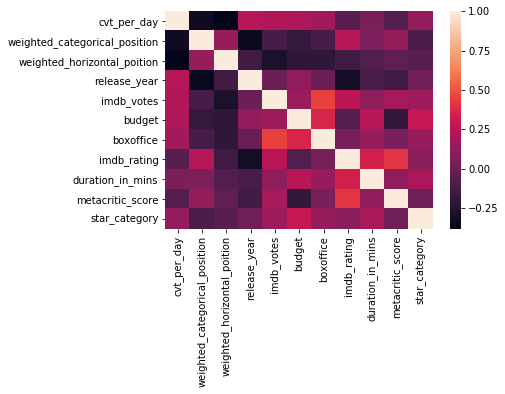

In [58]:
sns.heatmap(df.corr())

In [57]:
df.corr()

,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,release_year,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,star_category
cvt_per_day,1.000000,-0.325956,-0.379988,0.240147,0.218551,0.214803,0.172163,-0.066251,0.052008,-0.084928,0.136704
weighted_categorical_position,-0.325956,1.000000,0.142208,-0.347368,-0.124185,-0.188582,-0.126192,0.241695,0.062012,0.142004,-0.104209
weighted_horizontal_poition,-0.379988,0.142208,1.000000,-0.141039,-0.278302,-0.203144,-0.209757,-0.150835,-0.084298,-0.035184,-0.059366
release_year,0.240147,-0.347368,-0.141039,1.000000,0.001466,0.123113,-0.008001,-0.313072,-0.112120,-0.147624,0.018337
imdb_votes,0.218551,-0.124185,-0.278302,0.001466,1.000000,0.156443,0.444983,0.251552,0.120798,0.190641,0.169553
budget,0.214803,-0.188582,-0.203144,0.123113,0.156443,1.000000,0.363497,-0.084984,0.246056,-0.191834,0.283630
boxoffice,0.172163,-0.126192,-0.209757,-0.008001,0.444983,0.363497,1.000000,0.044249,0.141941,0.050286,0.140667
imdb_rating,-0.066251,0.241695,-0.150835,-0.313072,0.251552,-0.084984,0.044249,1.000000,0.335421,0.412972,0.098353
duration_in_mins,0.052008,0.062012,-0.084298,-0.112120,0.120798,0.246056,0.141941,0.335421,1.000000,0.119019,0.203811
metacritic_score,-0.084928,0.142004,-0.035184,-0.147624,0.190641,-0.191834,0.050286,0.412972,0.119019,1.000000,0.004824


### 1.5 Categorical columns

In [ ]:
print(data['import_id'].value_counts())
sns.stripplot(x="import_id", y="cvt_per_day", data=data, jitter=True)

In [ ]:
print(data['awards'].value_counts())
sns.stripplot(x="awards", y="cvt_per_day", data=data, jitter=True)

In [ ]:
print(data['mpaa'].value_counts())
sns.stripplot(x="mpaa", y="cvt_per_day", data=data, jitter=True)

In [ ]:
print(data['genres'].str.get_dummies(',').sum().sort_values(ascending=False))
data['genres'].str.get_dummies(',').sum().sort_values(ascending=False).plot(kind='bar')

## 2. Feature Engineering

### 2.1 Get Dummies for categorical columns

In [24]:
data = pd.get_dummies(data, columns = ['import_id', 'awards', 'mpaa'])

In [25]:
df_genres = data['genres'].str.get_dummies(',')
df_genres['other'] = df_genres['Holiday'] | df_genres['LGBT'] | df_genres['Adult'] | df_genres['Lifestyle'] | df_genres['Anime'] | df_genres['Reality']
df_genres = df_genres.drop(['Holiday','LGBT','Adult','Lifestyle','Anime','Reality'], axis=1)

In [26]:
data = pd.concat([data, df_genres], axis=1).drop('genres', axis=1)

### 2.2 Missing or Erronous value imputation

We try KNN to impute the zero values for each column in `missingCols`.

First we find that values in `imdb_votes` and `imdb_rating` are the same set of data

In [28]:
data[(data['imdb_votes'] != 0) & (data['imdb_rating'] == 0)].shape

(0, 48)

In [30]:
data

,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,release_year,imdb_votes,budget,boxoffice,imdb_rating,duration_in_mins,metacritic_score,star_category,import_id_lionsgate,import_id_mgm,import_id_other,import_id_paramount,awards_BAFTA,awards_Golden Globe,awards_Oscar,awards_no award,awards_other award,mpaa_G,mpaa_NC-17,mpaa_NotRated,mpaa_PG,mpaa_PG-13,mpaa_R,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Fantasy,Foreign/International,Horror,Independent,Kids & Family,Music,Musicals,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,other
video_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
385504,307127.605608,1,3,2013,69614,15000000,42930462,6.5,112.301017,51,1.710000,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
300175,270338.426375,1,3,2013,46705,15000000,3301046,6.5,94.983250,41,3.250000,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
361899,256165.867446,1,3,2012,197596,26000000,37397291,7.3,115.763675,58,2.646667,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
308314,196622.720996,3,4,2008,356339,15000000,15700000,7.6,130.703583,94,1.666667,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0
307201,159841.652064,1,3,2013,46720,27220000,8551228,6.4,105.545533,37,3.066667,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
389496,135076.609750,1,5,2000,13250,60000000,32095318,5.5,98.468350,37,2.750000,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
385507,134155.740199,1,6,2013,16188,11000000,8551228,5.2,94.336417,57,2.740000,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
380517,116906.007924,1,7,2014,24321,16000000,2428883,6.6,123.302517,68,3.002778,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
369857,116871.121620,2,9,2013,119679,45000000,12026670,6.4,107.212833,54,1.822222,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [60]:
from sklearn.neighbors import KNeighborsRegressor
kneigh = KNeighborsRegressor(n_neighbors=5, weights='distance')
df = data.drop(missingCols, axis=1)
# for col in missingCols:
#     y_train = data[data[col] != 0]
# y_train = data[(data['imdb_rating'] != 0) & (data['imdb_votes'] != 0)][['imdb_votes','imdb_rating']]
# X_train = data[(data['imdb_rating'] != 0) & (data['imdb_votes'] != 0)].drop(['imdb_votes','imdb_rating'],axis=1)

In [32]:
df

,cvt_per_day,weighted_categorical_position,weighted_horizontal_poition,release_year,duration_in_mins,import_id_lionsgate,import_id_mgm,import_id_other,import_id_paramount,awards_BAFTA,awards_Golden Globe,awards_Oscar,awards_no award,awards_other award,mpaa_G,mpaa_NC-17,mpaa_NotRated,mpaa_PG,mpaa_PG-13,mpaa_R,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Fantasy,Foreign/International,Horror,Independent,Kids & Family,Music,Musicals,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,other
video_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
385504,307127.605608,1,3,2013,112.301017,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
300175,270338.426375,1,3,2013,94.983250,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
361899,256165.867446,1,3,2012,115.763675,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
308314,196622.720996,3,4,2008,130.703583,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0
307201,159841.652064,1,3,2013,105.545533,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
389496,135076.609750,1,5,2000,98.468350,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
385507,134155.740199,1,6,2013,94.336417,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
380517,116906.007924,1,7,2014,123.302517,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
369857,116871.121620,2,9,2013,107.212833,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [ ]:
X_test = data[(data['imdb_rating'] == 0) | (data['imdb_votes'] == 0)]#.drop(['imdb_votes','imdb_rating'],axis=1)
# y_test = kneigh.fit(X_train, y_train).predict(X_test)

In [ ]:
y_test

In [ ]:
X_test

In [ ]:
np.random.seed(0)
X = np.sort(5*np.random.rand(40, 1),axis=0)
T = np.linspace(0, 5, 501)[:, np.newaxis]
y = np.sin(X).ravel()
y

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
regr = RandomForestRegressor(max_depth=5, random_state=0,
                             n_estimators=100)

In [ ]:
y = df['cvt_per_day']
X = df.drop('cvt_per_day',axis=1)

In [ ]:
regr.fit(X, y)

In [ ]:
print(regr.feature_importances_)